In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import plotly

In [108]:
data1 = pd.read_csv('/content/drive/MyDrive/Bootcamp_ALURA/Portifolio-Alura/Diário/Bases de Dados/A160324189_28_143_208.csv', decimal = ',' ,skiprows=3, skipfooter = 12 ,delimiter = ';', encoding = 'iso-8859-1',engine='python')
data1 = data1.replace('-', 0.0)
data1['2020/Ago'] = data1['2020/Ago'].astype('float64')
pd.options.display.float_format = '{:.2f}'.format

In [109]:
colunas_usaveis =  data1.mean().index.tolist() #Separa as colunas que, inicialmente, possuem todos os valores 
colunas_usaveis.insert(0, 'Unidade da Federação')

## Desafio 02: Adicionar uma coluna mostrando a região (Norte, Nodeste, Sul, Suldeste e Centro-Oeste) de cada estado.

In [110]:
data1['Unidade da Federação'] = data1['Unidade da Federação'].str[3:]
d = {'Rondônia': 'Norte','Acre': 'Norte','Amazonas': 'Norte','Roraima': 'Norte','Pará': 'Norte'
    ,'Amapá': 'Norte','Tocantins': 'Norte','Maranhão': 'Nordeste','Piauí': 'Nordeste','Ceará': 'Nordeste'
    ,'Rio Grande do Norte': 'Nordeste','Paraíba': 'Nordeste','Pernambuco': 'Nordeste','Alagoas': 'Nordeste','Sergipe': 'Nordeste'
    ,'Bahia': 'Nordeste','Minas Gerais': 'Sudeste','Espírito Santo': 'Sudeste','Rio de Janeiro': 'Sudeste','São Paulo': 'Sudeste'
    ,'Paraná': 'Sul','Santa Catarina': 'Sul','Rio Grande do Sul': 'Sul','Mato Grosso do Sul': 'Centro-Oeste','Mato Grosso': 'Centro-Oeste'
    ,'Goiás': 'Centro-Oeste','Distrito Federal': 'Centro-Oeste'}
data1['Região'] = data1['Unidade da Federação'].map(d)

In [111]:
colunas_obj =  list(data1.select_dtypes(include=['object']).columns)
colunas_obj.remove('Unidade da Federação')
colunas_obj.remove('Região')
data1[colunas_obj] = data1[colunas_obj].astype('float64') #Deixando o dataframe completo com todas as colunas em Float64

In [112]:
data1.dtypes

Unidade da Federação     object
1992/Mar                float64
1992/Abr                float64
1993/Mai                float64
1993/Dez                float64
                         ...   
2020/Jun                float64
2020/Jul                float64
2020/Ago                float64
Total                   float64
Região                   object
Length: 281, dtype: object

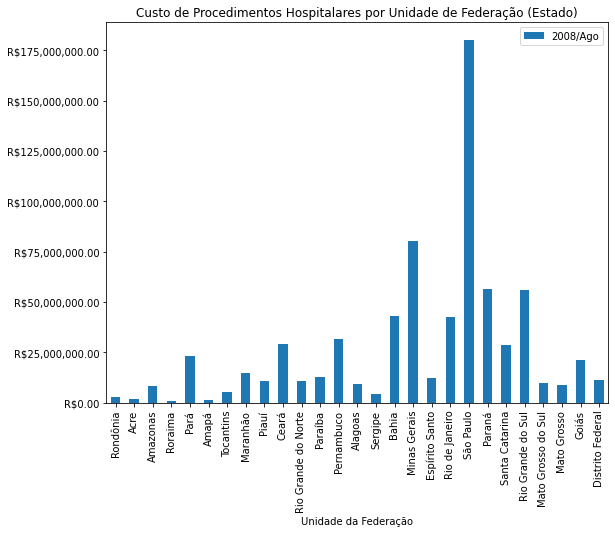

In [113]:
ax = data1.plot(x='Unidade da Federação', y = '2008/Ago', kind ='bar', figsize=(9, 7))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.2f}'))
plt.title("Custo de Procedimentos Hospitalares por Unidade de Federação (Estado)")
plt.show()

In [114]:
usaveis =  data1[colunas_usaveis] #informação que o dataframe possui quando todos os estados tem valores

In [115]:
usaveis = usaveis.set_index('Unidade da Federação')

In [116]:
usaveis = usaveis.drop('Total', axis = 1) #Remove a coluna total para análise em séries

In [117]:
values =  usaveis.mean()

In [118]:
values.idxmax(axis=0)

'2008/Jan'

# ANALISANDO VALORES OUTLIERS

In [119]:
teste =  usaveis[['2007/Dez','2008/Jan','2009/Fev',]]

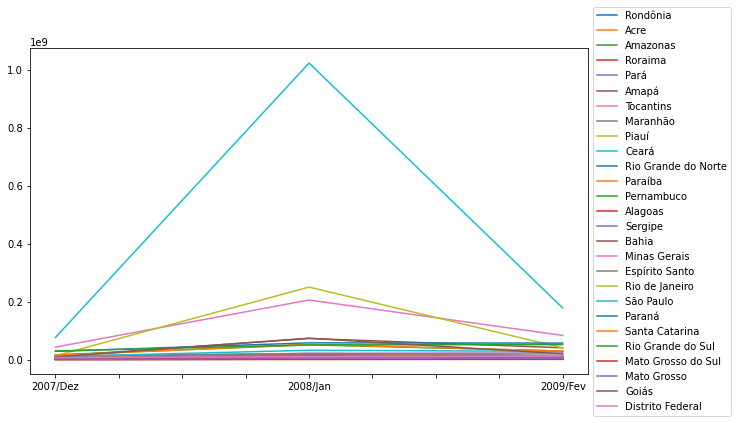

In [120]:
teste.T.plot(figsize =(10, 6))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#### Criando uma análise através de um percentual de crescimento

In [121]:
teste['percentual'] =  (teste['2008/Jan']-teste['2007/Dez'])/teste['2007/Dez']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##### Setando que o valores "real" deve ser a média dos outros dois valores se o percentual de crescimento de jan em relação a dezembro for maior que 2.5

In [122]:
teste.loc[teste['percentual'] > 2.5, '2008/Jan'] = ((teste['2007/Dez']+teste['2009/Fev'])/2) ##Forçadamente coloca valores

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [123]:
teste['percentual_novo'] =  (teste['2008/Jan']-teste['2007/Dez'])/teste['2007/Dez']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



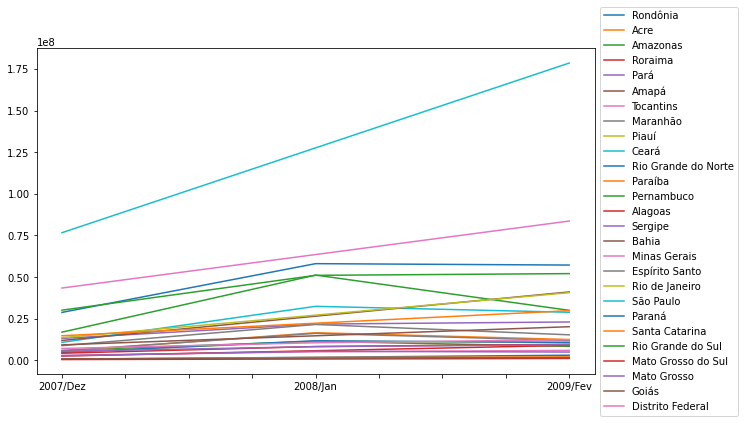

In [124]:
teste = teste.drop(['percentual_novo','percentual' ], axis = 1) #
teste.T.plot(figsize =(10, 6))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

## Voltando a base de dados original

In [125]:
usaveis['percentual'] =  (usaveis['2008/Jan']-usaveis['2007/Dez'])/usaveis['2007/Dez']
usaveis.loc[usaveis['percentual'] > 2.5, '2008/Jan'] = ((usaveis['2007/Dez']+usaveis['2009/Fev'])/2) ##Forçadamente coloca valores
usaveis['percentual_novo'] =  (usaveis['2008/Jan']-usaveis['2007/Dez'])/usaveis['2007/Dez']
usaveis = usaveis.drop(['percentual_novo','percentual' ], axis = 1) #

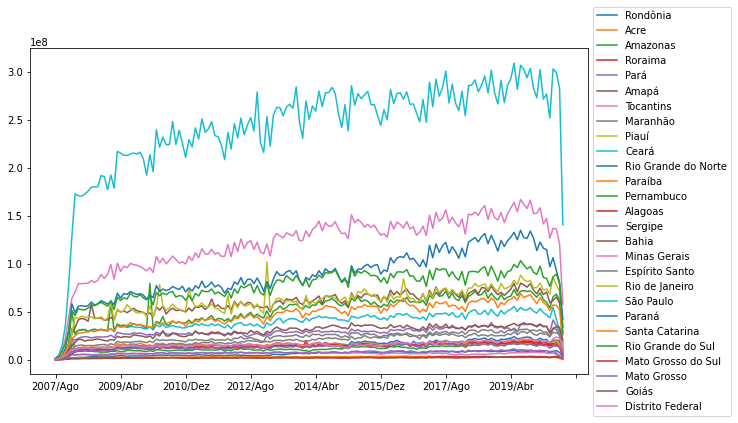

In [126]:
usaveis.T.plot(figsize =(10, 6))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [127]:
## Problema em '2008/Jan', nos estados:São Paulo, Rio de Janeiro, Distrito Federal

In [128]:
## Melhorar a legenda
## Selecionar os 5 estados

In [129]:
Estados =  usaveis.loc[['São Paulo', 'Maranhão', 'Amazonas', 'Distrito Federal', 'Rio de Janeiro']]

In [130]:
Estados

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,127632462.10,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,...,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31,140414944.95
Maranhão,385330.18,1018352.93,2277717.78,4334468.23,8832514.85,21551600.33,13452263.93,14750895.33,15148647.11,14543679.92,14553978.06,14536700.20,14609872.57,15317881.85,15617699.59,15643973.86,14644528.47,16509174.38,15323800.01,19000528.61,17947811.13,18274483.44,18108112.36,18026071.20,18566524.68,18710607.19,19044993.31,18373019.22,17558736.88,19282093.56,17569101.52,21316090.03,19804547.24,20646225.47,19887224.90,20272804.23,20504334.40,20002266.78,19676260.18,19181018.80,...,29026652.11,27315185.49,28479060.68,29340983.81,27271119.78,28743285.70,28083157.75,27083233.19,29401736.85,26330254.03,29895181.77,30897068.02,30281504.24,28453973.46,30806965.30,30838532.57,29976987.17,30994778.85,28237905.90,27802462.95,30160826.23,27614666.06,30322908.98,30475196.99,32603116.94,29832196.37,31269773.20,31374191.37,31588787.38,30157243.62,30849081.57,29632234.87,31256187.80,28457299.99,28832662.46,23938156.77,32979447.97,31128144.66,24374205.15,10916718.78
Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73
Distrito Federal,191951.47,769966.25,2165619.56,3813256.48,7121965.42,10561085.46,10215956.80,11627918.26,11922015.36,11900817.00,11969271.76,11299443.00,11548451.89,12422577.60,12419976.84,12302698.99,12005669.60,13150489.00,1235

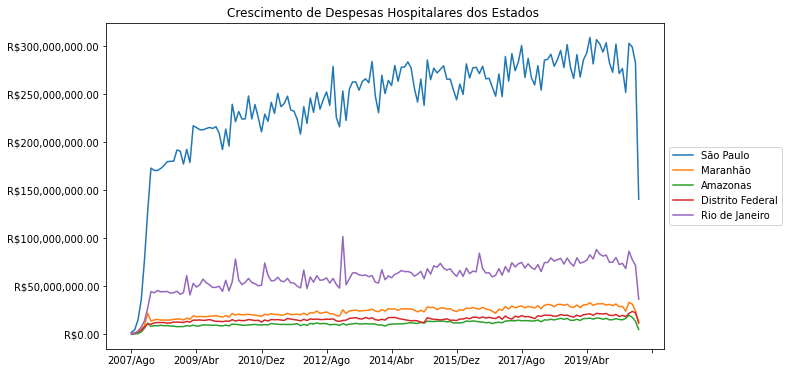

In [131]:
ax = Estados.T.plot(figsize =(10, 6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.2f}'))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Crescimento de Despesas Hospitalares dos Estados ")
plt.show()

In [132]:
usaveis['Total'] = usaveis.sum(axis = 1)
ordenado_por_total = usaveis.sort_values('Total', ascending=False)
ordenado_por_total = ordenado_por_total.drop('Total', axis = 1)


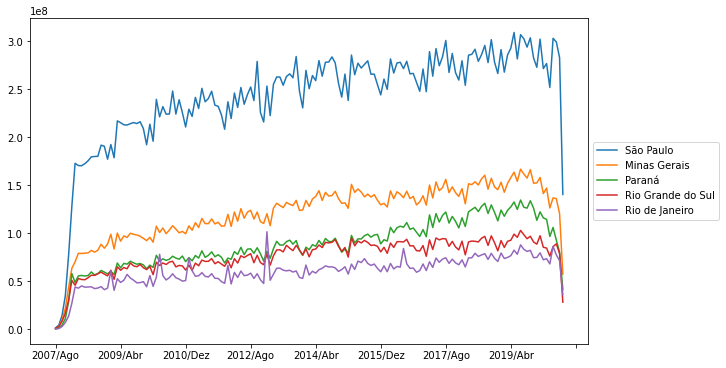

In [133]:
ordenado_por_total_5 = ordenado_por_total.head(5)
ordenado_por_total.head(5).T.plot(figsize =(10, 6))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

## Desafio 1: alterar o palette

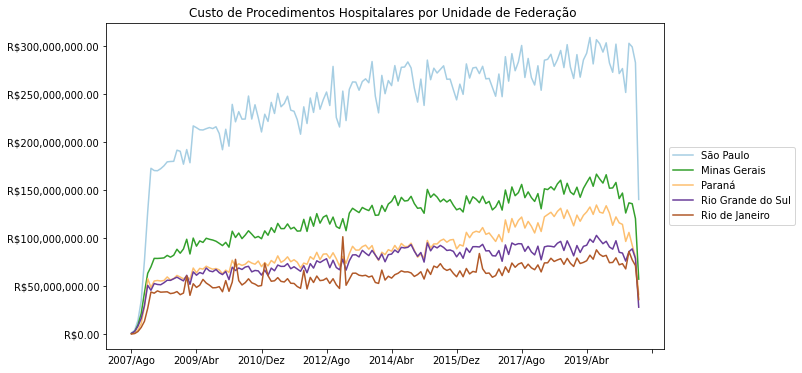

In [134]:
ax = ordenado_por_total_5.T.plot(figsize =(10, 6), colormap='Paired')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.2f}'))
plt.title("Custo de Procedimentos Hospitalares por Unidade de Federação ")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [135]:
ordenado_por_total_5

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,127632462.10,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,...,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31,140414944.95
Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,63552318.69,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,...,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,57473699.06
Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,...,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69,41542401.16
Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,5

## Desafio 04: Adicione o seu estado aos 5 estados plotados anteriormente (Maranhão)

In [136]:
ordenado_por_total_6 = ordenado_por_total_5.append(ordenado_por_total.iloc[[11]])

In [137]:
ordenado_por_total_6

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,127632462.10,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,...,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31,140414944.95
Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,63552318.69,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,...,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,57473699.06
Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,...,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69,41542401.16
Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,5

In [138]:
colunas_s_problemas = ordenado_por_total_6.columns[6:-1]
ordenado_por_total_6 = ordenado_por_total_6[colunas_s_problemas]

In [139]:
ordenado_por_total_6

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,210611460.51,229087002.84,221598043.65,241399914.84,229821234.45,250793569.77,...,263471759.13,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31
Minas Gerais,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107738915.82,103140773.07,111065995.94,106094329.28,115487199.35,...,136715099.44,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
Paraná,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,70517638.39,74712784.07,71314740.25,76914668.09,74232937.37,81709021.05,...,106027687.78,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69
Rio Grande do Sul,45897704.82,52928695.92,51972416.77,51679350.79,53759674.01,5

### Desafio 03: Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável (Bonitão, segundo o Gui)

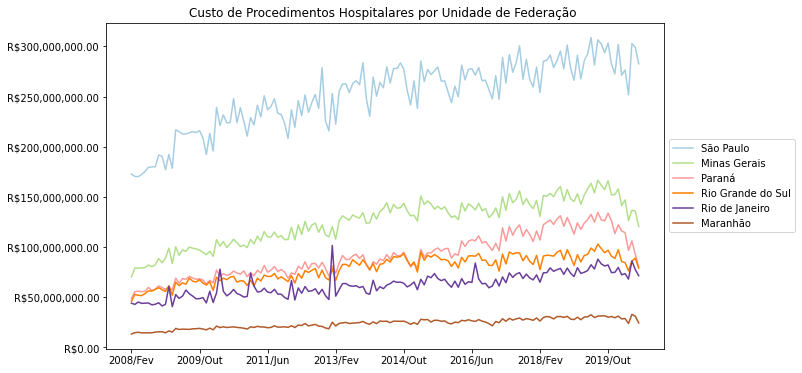

In [140]:
ax = ordenado_por_total_6.T.plot(figsize =(10, 6), colormap='Paired')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.2f}'))
plt.title("Custo de Procedimentos Hospitalares por Unidade de Federação ")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# Desafio 06: Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região

In [141]:
colunas_usaveis.insert(0, 'Região')
colunas_usaveis.remove('Unidade da Federação')

In [142]:
Regiao = data1[colunas_usaveis]
Regiao = Regiao.drop('Total', axis = 1)

In [143]:
Regiao_DF =  Regiao.groupby('Região', as_index=False).sum()

In [144]:
Regiao_DF = Regiao_DF.set_index('Região')

In [145]:
N_col = Regiao_DF.columns[12:-40]
N_Regiao_DF = Regiao_DF[N_col]

In [146]:
print(Regiao_DF.columns[12:-40])

Index(['2008/Ago', '2008/Set', '2008/Out', '2008/Nov', '2008/Dez', '2009/Jan',
       '2009/Fev', '2009/Mar', '2009/Abr', '2009/Mai',
       ...
       '2016/Jul', '2016/Ago', '2016/Set', '2016/Out', '2016/Nov', '2016/Dez',
       '2017/Jan', '2017/Fev', '2017/Mar', '2017/Abr'],
      dtype='object', length=105)


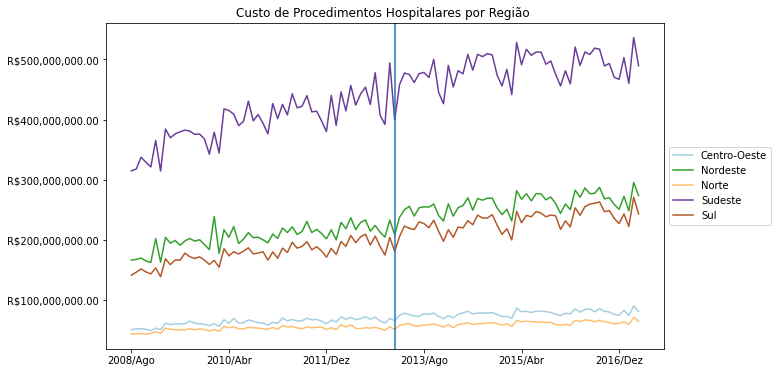

In [147]:
ax = N_Regiao_DF.T.plot(figsize =(10, 6), colormap='Paired')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.2f}'))
plt.title("Custo de Procedimentos Hospitalares por Região ")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.axvline(x=54) #encontrando 2013/Fev
plt.show()

## Todas as regiões possuem essa queda nos valores

# Desafio 07: Adicionar seu estado escolhido novamente, deixe o gráfico informativo e tire conclusões sobre seus estados comparando com os demais. Tire suas conclusões e compartilhe com a gente.

In [148]:
Regiao_DF

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Região,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Centro-Oeste,634465.91,1994139.86,5361386.06,10261713.14,26088084.77,101139358.42,44574514.79,51830387.75,51359623.44,50283669.63,52009888.28,51265708.77,51180178.66,52934204.45,53081928.67,52045894.18,49701015.57,53779527.53,51535369.24,62084658.66,59721577.61,61055214.57,61061605.92,61368348.10,65646951.59,62286860.39,60853444.35,60309484.79,57942210.25,61510507.36,56905819.66,67930541.39,62094796.54,69948537.90,62607799.75,62701526.87,67508546.42,65547681.48,63011373.59,62074258.52,...,87289724.42,84754519.35,84900688.92,89811624.02,81895899.60,86144901.43,80291993.87,77885341.55,84404467.61,78608626.50,88831063.96,86257370.78,89621383.29,85110706.09,88011735.19,89922399.12,85489098.45,90179299.63,85098701.05,81999472.22,86416800.96,82993576.61,88233197.10,90983764.47,95299526.66,88771429.12,92583303.06,95283271.77,91799654.68,93831963.79,89265376.48,84929663.80,90840178.95,84577615.64,85764971.80,73219693.75,83992872.23,88341074.99,81324695.69,42520934.96
Nordeste,1863465.81,4373676.55,11981822.18,27667726.92,68937797.91,240233627.20,143170221.70,163986250.16,169546980.47,169279054.51,161307575.30,182631707.98,166813086.44,168149195.92,170330608.76,165396711.32,163085801.66,202595491.38,163451462.14,204609388.78,195038574.57,199391698.85,191469883.45,198725363.21,202722430.11,198393665.99,200684037.33,192584246.77,184367168.39,239363499.24,177953656.96,217389417.25,204724200.36,222675880.46,194423247.10,201845931.69,212368422.20,204038687.98,204915989.17,200577037.43,...,304199292.96,284478452.35,292572852.35,304413487.25,282228280.62,295937549.16,280123199.32,269787499.34,293723811.29,259239528.41,296439744.20,303031041.02,312691505.68,292611640.07,305217110.82,315754956.58,290161937.70,315437604.30,291771630.25,278660709.51,303716429.55,284772373.71,299400607.05,308351934.78,332241953.25,300860901.65,324737398.29,321122642.13,317420669.40,325348004.05,304280785.96,291045984.59,313214292.70,286186822.01,284252110.84,247582825.54,291127863.98,282825489.06,245911328.83,117866467.32
Norte,274163.86,702698.79,3034989.40,9438700.38,24930500.29,44017418.18,38844188.02,42058042.63,43806481.51,45231240.95,44643930.10,43735684.31,44224992.50,44499904.46,44847041.79,44277312.77,44950230.48,48215212.04,45308586.15,54026837.93,51813801.79,51645252.76,50881864.42,51036564.73,52887096.10,51018856.28,52933630.77,51308379.31,49144353.01,51588403.75,48521391.60,56875455.88,54444882.95,56246429.60,52818872.35,52754387.98,55104821.48,54613086.14,53876926.72,52932831.88,...,70562029.99,68342011.18,68995718.93,70621753.19,68434808.74,69735041.10,67354871.16,66307093.09,69852825.90,62859787.25,70453476.50,70977643.84,74367196.35,70580522.95,72841735.60,75410695.12,71791262.67,77822894.11,70003796.02,68623448.48,72421205.47,67715770.80,72901945.25,71953402.86,72079637.35,68310792.30,78271579.42,77340361.36,76277098.92,78765536.95,75414428.92,74370763.81,77196660.63,73819692.73,71682268.87,65225598.45,83998905.79,75232976.77,58932690.50,24654609.93
Sudeste,3163621.72,8501821.51,28742187.01,66309452.92,139449387.76,1496254347.26,297291483.85,304755569.67,307074038.20,307411386.26,311017861.48,318279330.75,315144195.00,318035764.58,337698269.16,32926

In [149]:
ordenado_por_total_6

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,210611460.51,229087002.84,221598043.65,241399914.84,229821234.45,250793569.77,...,263471759.13,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31
Minas Gerais,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107738915.82,103140773.07,111065995.94,106094329.28,115487199.35,...,136715099.44,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
Paraná,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,70517638.39,74712784.07,71314740.25,76914668.09,74232937.37,81709021.05,...,106027687.78,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69
Rio Grande do Sul,45897704.82,52928695.92,51972416.77,51679350.79,53759674.01,5

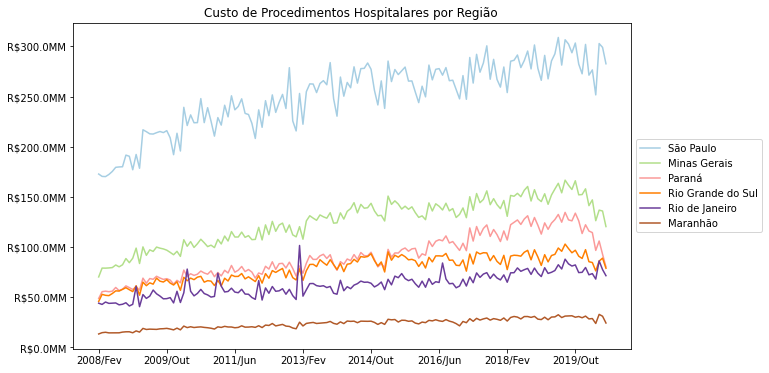

In [150]:
ax = (ordenado_por_total_6/10e5).T.plot(figsize =(10, 6), colormap='Paired')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:}MM'))
plt.title("Custo de Procedimentos Hospitalares por Região ")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [151]:
ordenado_por_total_6.iloc[:,-1:]

,2020/Jul
Unidade da Federação,
São Paulo,282709570.31
Minas Gerais,120467187.34
Paraná,80320852.69
Rio Grande do Sul,78929703.81
Rio de Janeiro,71540227.33
Maranhão,24374205.15


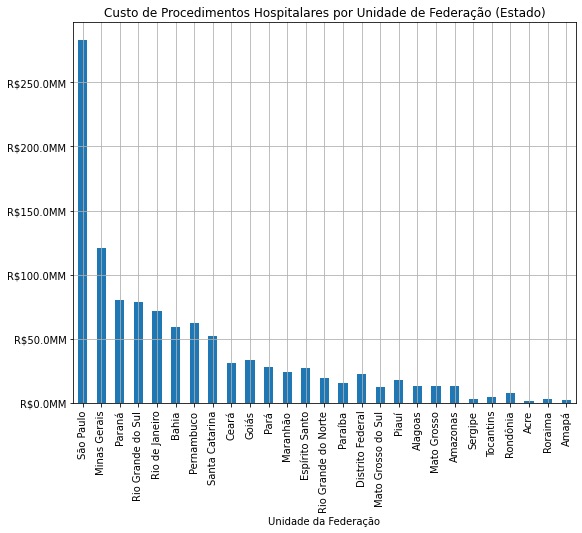

In [152]:
ax = (ordenado_por_total[ordenado_por_total.columns[-2]]/10e5).plot(kind ='bar', figsize=(9, 7))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:}MM'))
plt.title("Custo de Procedimentos Hospitalares por Unidade de Federação (Estado)")
plt.grid()
plt.show()

In [153]:
 Gastos_recentes =   pd.DataFrame(ordenado_por_total[ordenado_por_total.columns[-2]])

In [154]:
ordenado_por_total[ordenado_por_total.columns[-2]]/ordenado_por_total[ordenado_por_total.columns[-2]].loc['Maranhão']

Unidade da Federação
São Paulo             11.60
Minas Gerais           4.94
Paraná                 3.30
Rio Grande do Sul      3.24
Rio de Janeiro         2.94
Bahia                  2.42
Pernambuco             2.56
Santa Catarina         2.12
Ceará                  1.26
Goiás                  1.37
Pará                   1.13
Maranhão               1.00
Espírito Santo         1.13
Rio Grande do Norte    0.80
Paraíba                0.64
Distrito Federal       0.91
Mato Grosso do Sul     0.51
Piauí                  0.74
Alagoas                0.54
Mato Grosso            0.54
Amazonas               0.55
Sergipe                0.14
Tocantins              0.18
Rondônia               0.30
Acre                   0.05
Roraima                0.11
Amapá                  0.09
Name: 2020/Jul, dtype: float64

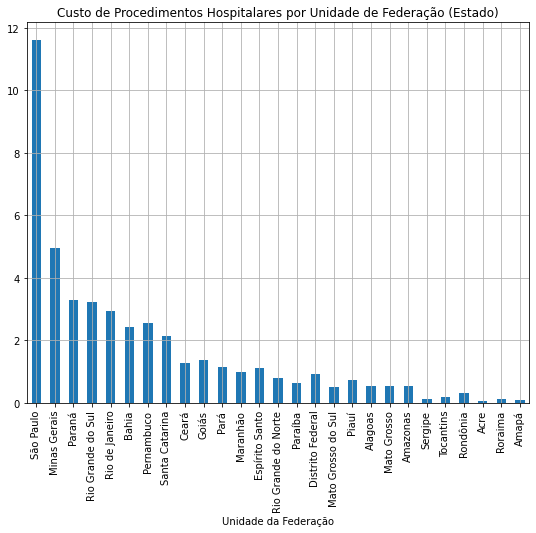

In [155]:
ax = (ordenado_por_total[ordenado_por_total.columns[-2]]/ordenado_por_total[ordenado_por_total.columns[-2]].loc['Maranhão']).plot(kind ='bar', figsize=(9, 7))

plt.title("Custo de Procedimentos Hospitalares por Unidade de Federação (Estado)")
plt.grid()
plt.show()

### Trazendo via webscrapping do PANDAS

In [156]:
populacao = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o', match='Unidade federativa')

In [157]:
populacaoDF = pd.concat(populacao)

In [158]:
populacaoDF = pd.DataFrame(populacaoDF)

In [159]:
populacaoDF = populacaoDF.rename(columns={'Unidade federativa':'UF','População':'populacao'})
DF_Pop = populacaoDF[['UF', 'populacao']].set_index('UF')

In [160]:
DF_Pop.loc[:, ('populacao')] = DF_Pop['populacao'].str.replace(' ', '').astype('int32')

In [161]:
DF_Pop
Gastos_recentes

,2020/Jul
Unidade da Federação,
São Paulo,282709570.31
Minas Gerais,120467187.34
Paraná,80320852.69
Rio Grande do Sul,78929703.81
Rio de Janeiro,71540227.33
Bahia,58898100.40
Pernambuco,62325444.34
Santa Catarina,51764534.76
Ceará,30809221.22


In [162]:
UF_p_Pop =  DF_Pop.join(Gastos_recentes)
UF_p_Pop_Final = UF_p_Pop.copy()


In [163]:
Gastos_recentes

,2020/Jul
Unidade da Federação,
São Paulo,282709570.31
Minas Gerais,120467187.34
Paraná,80320852.69
Rio Grande do Sul,78929703.81
Rio de Janeiro,71540227.33
Bahia,58898100.40
Pernambuco,62325444.34
Santa Catarina,51764534.76
Ceará,30809221.22


In [164]:
UF_p_Pop_Final['Gasto_hab'] = UF_p_Pop_Final['2020/Jul']/UF_p_Pop_Final['populacao']

##### Gráfico ruim de correlacionamento de dimensões

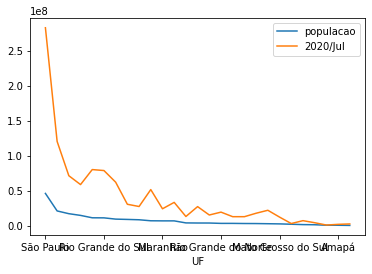

In [165]:
UF_p_Pop.plot()

##### Gráficos de gasto por habitante

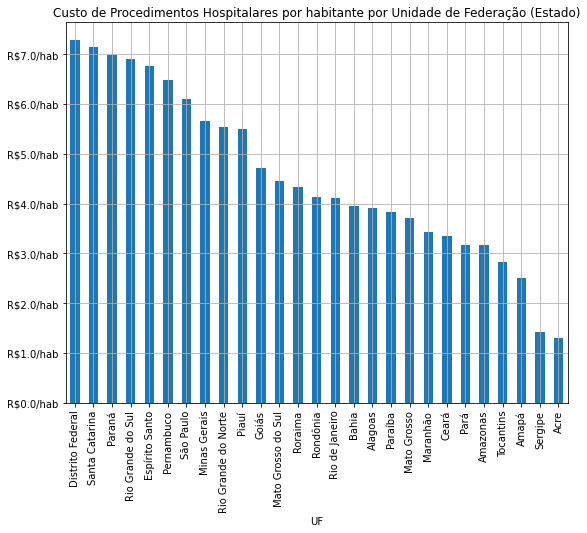

In [166]:
ax = (UF_p_Pop_Final['Gasto_hab'].sort_values(ascending = False)).plot(kind ='bar', figsize=(9, 7))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:}/hab'))
plt.title("Custo de Procedimentos Hospitalares por habitante por Unidade de Federação (Estado)")
plt.grid()
plt.show()

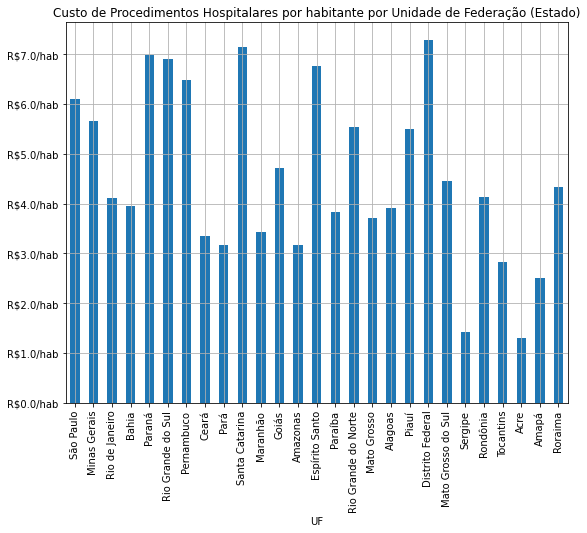

In [167]:
ax = (UF_p_Pop_Final['Gasto_hab']).plot(kind ='bar', figsize=(9, 7))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:}/hab'))
plt.title("Custo de Procedimentos Hospitalares por habitante por Unidade de Federação (Estado)")
plt.grid()
plt.show()

In [168]:
DF_Sorted  =  UF_p_Pop_Final.sort_values(by=['populacao'], ascending= False)

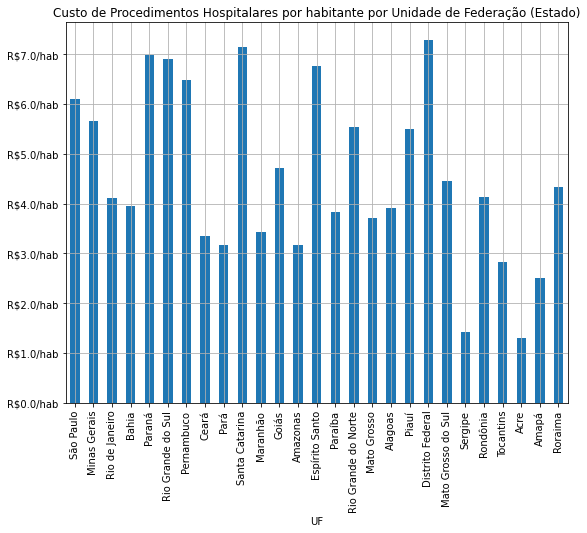

In [169]:
ax = (DF_Sorted['Gasto_hab']).plot(kind ='bar', figsize=(9, 7))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:}/hab'))
plt.title("Custo de Procedimentos Hospitalares por habitante por Unidade de Federação (Estado)")
plt.grid()
plt.show()

In [170]:
import seaborn as sns

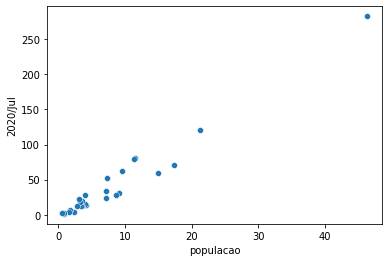

In [171]:
sns.scatterplot(data = UF_p_Pop_Final/10e5, x='populacao', y = '2020/Jul')

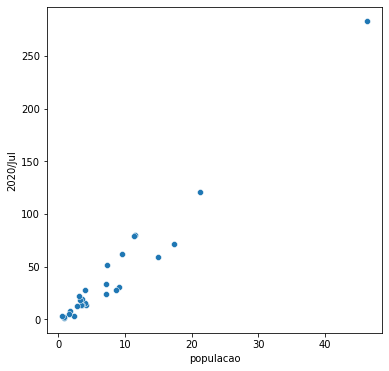

In [172]:
plt.figure(figsize=(6,6))
sns.scatterplot(data = UF_p_Pop_Final/10e5, x='populacao', y = '2020/Jul')

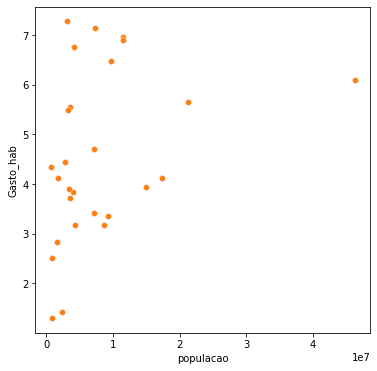

In [173]:
plt.figure(figsize=(6,6))
sns.scatterplot(data = UF_p_Pop_Final, x='populacao', y = 'Gasto_hab')
sns.scatterplot(data = UF_p_Pop_Final, x='populacao', y = 'Gasto_hab')

In [174]:
UF_p_Pop_Final

,populacao,2020/Jul,Gasto_hab
UF,,,
São Paulo,46289333,282709570.31,6.11
Minas Gerais,21292666,120467187.34,5.66
Rio de Janeiro,17366189,71540227.33,4.12
Bahia,14930634,58898100.40,3.94
Paraná,11516840,80320852.69,6.97
Rio Grande do Sul,11422973,78929703.81,6.91
Pernambuco,9616621,62325444.34,6.48
Ceará,9187103,30809221.22,3.35
Pará,8690745,27618727.51,3.18


In [184]:
ultimos_gastos = ordenado_por_total[['2020/Mai','2020/Jul', '2020/Ago', '2020/Jun']]

In [185]:
UF_p_Pop_Rec = DF_Pop.join(ultimos_gastos)

In [186]:
def gastos_e_gasto_por_Hab(dados_in,mes:str):
  dados = dados_in.copy()
  dados[f'Gasto_hab_{mes}'] = dados[mes]/dados['populacao']
  return(dados)

In [187]:
teste =  gastos_e_gasto_por_Hab(UF_p_Pop_Rec,'2020/Jul')

In [188]:
teste = gastos_e_gasto_por_Hab(teste,'2020/Jun')


In [189]:
teste = gastos_e_gasto_por_Hab(teste,'2020/Mai')

In [191]:
teste

,populacao,2020/Mai,2020/Jul,2020/Ago,2020/Jun,Gasto_hab_2020/Jul,Gasto_hab_2020/Jun,Gasto_hab_2020/Mai
UF,,,,,,,,
São Paulo,46289333,302857660.98,282709570.31,140414944.95,299060851.62,6.11,6.46,6.54
Minas Gerais,21292666,136867275.75,120467187.34,57473699.06,135977571.87,5.66,6.39,6.43
Rio de Janeiro,17366189,86281033.16,71540227.33,36264322.65,77604925.21,4.12,4.47,4.97
Bahia,14930634,61756775.71,58898100.40,26023558.53,65159300.63,3.94,4.36,4.14
Paraná,11516840,106103737.62,80320852.69,41542401.16,92901461.36,6.97,8.07,9.21
Rio Grande do Sul,11422973,86076113.42,78929703.81,28349257.38,89019478.82,6.91,7.79,7.54
Pernambuco,9616621,65424719.40,62325444.34,33544876.14,68145110.59,6.48,7.09,6.80
Ceará,9187103,54200339.48,30809221.22,14559529.59,42146555.81,3.35,4.59,5.90
Pará,8690745,41248502.78,27618727.51,11559714.54,35396030.78,3.18,4.07,4.75


No handles with labels found to put in legend.


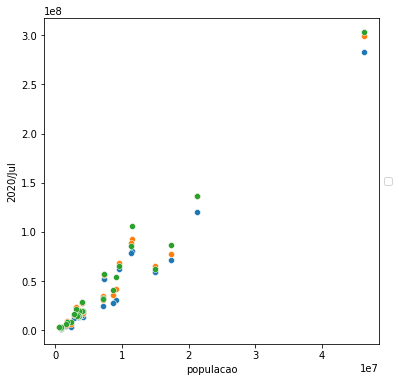

In [190]:
plt.figure(figsize=(6,6))
sns.scatterplot(data = teste, x='populacao', y = '2020/Jul')
sns.scatterplot(data = teste, x='populacao', y = '2020/Jun')
sns.scatterplot(data = teste, x='populacao', y = '2020/Mai')

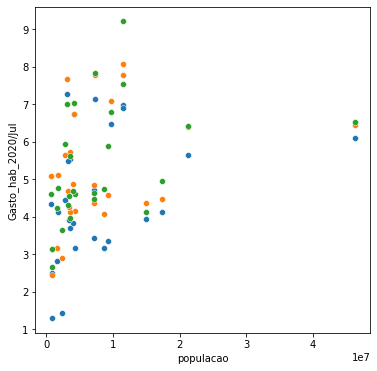

In [192]:
plt.figure(figsize=(6,6))
sns.scatterplot(data = teste, x='populacao', y = 'Gasto_hab_2020/Jul')
sns.scatterplot(data = teste, x='populacao', y = 'Gasto_hab_2020/Jun')
sns.scatterplot(data = teste, x='populacao', y = 'Gasto_hab_2020/Mai')